In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
(train_image, train_label), (test_image, test_label) = tf.keras.datasets.fashion_mnist.load_data()

In [13]:
print(train_image.shape, train_label.shape, test_image.shape, test_label.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


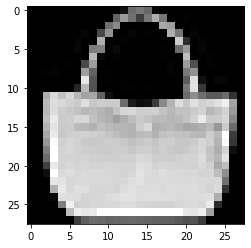

In [18]:
plt.imshow(train_image[100], cmap='gray')

In [23]:
# 归一化处理
train_image = train_image / 0xff
test_image = test_image / 0xff

In [24]:
# 建立模型
model = tf.keras.Sequential([
    # Dense 处理 1维 => 1维 的运算，因此需要先扁平化 28 * 28
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # 取隐藏层单元数为128。量级不能太小，太小会导致欠拟合。太大会导致过拟合
    tf.keras.layers.Dense(128, activation='relu'),
    # 输出层（分类为10种），使用softmax，使输出的10个值之和为1
    tf.keras.layers.Dense(10, activation='softmax')
])

In [25]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(train_image, train_label, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.5039 - acc: 0.8222
Epoch 2/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3791 - acc: 0.8628
Epoch 3/5
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3348 - acc: 0.8783
Epoch 4/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3128 - acc: 0.8862
Epoch 5/5
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2932 - acc: 0.8921


In [28]:
# 使用测试集评估模型准确率和损失值
model.evaluate(test_image, test_label)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3417892378091812, 0.8778]

## 使用 one-hot(独热) 编码


In [32]:
train_label_onehot = tf.keras.utils.to_categorical(train_label)
test_label_onehot = tf.keras.utils.to_categorical(test_label)

In [38]:
train_label_onehot.shape, train_label_onehot, test_label_onehot.shape, test_label_onehot

((60000, 10), array([[0., 0., 0., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), (10000,
  10), array([[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

In [88]:
# 建立模型
model = tf.keras.Sequential([
    # Dense 处理 1维 => 1维 的运算，因此需要先扁平化 28 * 28
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # 取隐藏层单元数为128。量级不能太小，太小会导致欠拟合。太大会导致过拟合
    tf.keras.layers.Dense(128, activation='relu'),
    # 添加 Dropout 层，抑制过拟合
    tf.keras.layers.Dropout(0.5),
    # 添加多层，增加拟合能力
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    # 输出层（分类为10种），使用softmax，使输出的10个值之和为1
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)             

In [89]:
model.compile(
    # optimizer='adam',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['acc']
)

In [90]:
history = model.fit(
    train_image, train_label_onehot, epochs=10,
    # 交叉验证(cross_validation，简称cv), 此处用的test测试数据，实际上是不合适的，应该再提供一份cv数据
    validation_data=(test_image, test_label_onehot)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.8708 - acc: 0.6827 - val_loss: 0.5284 - val_acc: 0.8058
Epoch 2/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.6219 - acc: 0.7809 - val_loss: 0.4849 - val_acc: 0.8241
Epoch 3/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.5737 - acc: 0.7992 - val_loss: 0.4509 - val_acc: 0.8376
Epoch 4/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.5448 - acc: 0.8103 - val_loss: 0.4341 - val_acc: 0.8437
Epoch 5/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.5288 - acc: 0.8174 - val_loss: 0.4228 - val_acc: 0.8462
Epoch 6/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.5114 - acc: 0.8204 - val_loss: 0.4192 - val_acc: 0.8503
Epoch 7/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.5048 - acc: 0.8217 - val_loss: 0.

In [91]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [92]:
model.evaluate(test_image, test_label_onehot)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.40734916253089903, 0.8555]

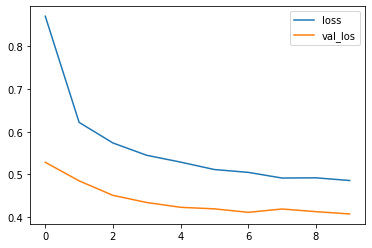

In [93]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_los')
plt.legend()

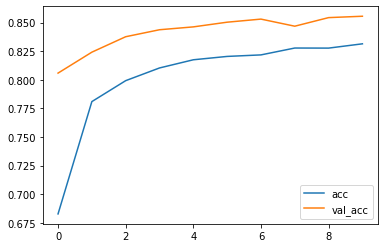

In [94]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()